<a href="https://colab.research.google.com/github/jojosam90/auto-encoder/blob/main/mnist_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
from keras import layers
from keras.datasets import mnist
from keras.callbacks import TensorBoard

import numpy as np
import matplotlib.pyplot as plt

In [19]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [20]:
# Adding Gaussian noise 

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)  #np.clip : adding 0 as the 1st value and 1 to the last value of array
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

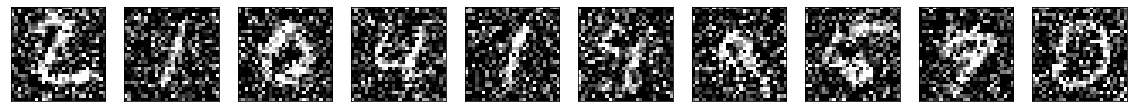

In [21]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):   # draw 11 images as n+1
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [30]:
input_img = tf.keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #padding :image size wont decreased , (28,28,32)
x = layers.MaxPooling2D((2, 2), padding='same')(x)  
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)  # (14,14,32)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
# At this point the representation is (7, 7, 32) and encoder learns to remove noise from images

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# At this point the representation is (28, 28) and upsampling to rebuild images.

autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 7, 7, 32)          9248

In [23]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 15s 8ms/step - loss: 0.1659 - val_loss: 0.1174
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1137 - val_loss: 0.1091
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1079 - val_loss: 0.1051
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1053 - val_loss: 0.1033
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1032 - val_loss: 0.1016
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1018 - val_loss: 0.1002
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1007 - val_loss: 0.0996
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0999 - val_loss: 0.0990
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0992 - val_loss: 0.0980
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0985 - val_l

In [24]:
preds = autoencoder.predict(x_test_noisy) 

In [34]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

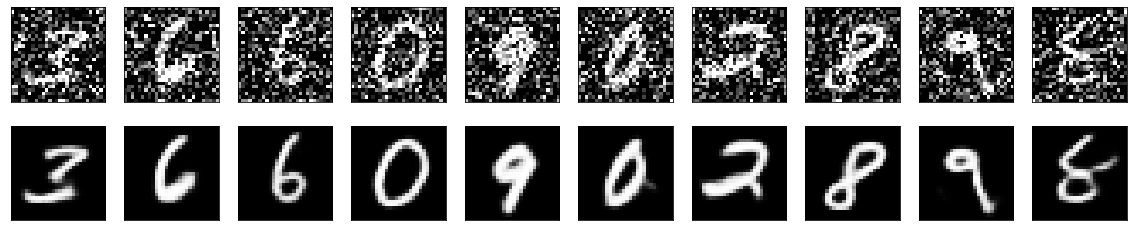

In [36]:
display(x_test_noisy, preds)